In [2]:
import numpy as np
import pandas as pd
import scipy.io
import os
from scipy.signal import savgol_filter
from dtaidistance import dtw
import seaborn as sns
from sklearn import preprocessing
from numpy import inf
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
import scipy.spatial.distance as ssd
from tqdm import tqdm

In [3]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\\'

In [4]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [5]:
Ratings = pd.read_excel(load_path + 'Ratings.xlsx')

In [6]:
presentations_ids = Features['presentation_id'].values
presentations_ids.shape

(603,)

In [21]:
indices_dict = []
series_gsr = []
series_neuro_sky = []
series_attention = []
series_meditation = []
series_alpha = []
series_beta = []
series_delta = []
series_gamma = []
series_theta = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    data_path = './../../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    #data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        resistance = signal['Data_GSR'][:,4]
        
        resistance = savgol_filter(resistance, 501, 3)
        series_gsr.append(resistance)
    
    data_path = './../../ASCERTAIN_Raw/EEGData/Movie_P' + str(user_id).zfill(2) + '/EEG_Clip' + str(clip_id) + '.mat'
    #data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/EEGData/Movie_P' + str(user_id).zfill(2) + '/EEG_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        
        neuro_sky_EEG_raw = np.array(signal['ThisEEG'][0])
        attention_raw = np.array(signal['ThisEEG'][1])
        meditation_raw = np.array(signal['ThisEEG'][2])
        alpha_raw = np.array(signal['ThisEEG'][3])
        beta_raw = np.array(signal['ThisEEG'][4])
        delta_raw = np.array(signal['ThisEEG'][5])
        gamma_raw = np.array(signal['ThisEEG'][6])
        theta_raw = np.array(signal['ThisEEG'][7])
        
        window = 51 #101
        order = 4 #3
        try:
            neuro_sky_EEG_raw = savgol_filter(neuro_sky_EEG_raw, window, order)
            attention_raw = savgol_filter(attention_raw, window, order)
            meditation_raw = savgol_filter(meditation_raw, window, order)
            alpha_raw = savgol_filter(alpha_raw, window, order)
            beta_raw = savgol_filter(beta_raw, window, order)
            delta_raw = savgol_filter(delta_raw, window, order)
            gamma_raw = savgol_filter(gamma_raw, window, order)
            theta_raw = savgol_filter(theta_raw, window, order)
        except:
            l = len(neuro_sky_EEG_raw)
            neuro_sky_EEG_raw = np.zeros(l)
            attention_raw = np.zeros(l)
            meditation_raw = np.zeros(l)
            alpha_raw = np.zeros(l)
            beta_raw = np.zeros(l)
            delta_raw = np.zeros(l)
            gamma_raw = np.zeros(l)
            theta_raw = np.zeros(l)
        
        series_neuro_sky.append(neuro_sky_EEG_raw)
        series_attention.append(attention_raw)
        series_meditation.append(meditation_raw)
        series_alpha.append(alpha_raw)
        series_beta.append(beta_raw)
        series_delta.append(delta_raw)
        series_gamma.append(gamma_raw)
        series_theta.append(theta_raw)

In [7]:
dm_attention = dtw.distance_matrix_fast(series_attention)
np.save('dm_attention', dm_attention)

In [8]:
dm_meditation = dtw.distance_matrix_fast(series_meditation)
np.save('dm_meditation', dm_meditation)

In [9]:
dm_alpha = dtw.distance_matrix_fast(series_alpha)
np.save('dm_alpha', dm_alpha)

In [10]:
dm_neuro_sky = dtw.distance_matrix_fast(series_neuro_sky)
np.save('dm_neuro_sky', dm_neuro_sky)

In [11]:
dm_beta = dtw.distance_matrix_fast(series_beta)
np.save('dm_beta', dm_beta)

In [12]:
dm_delta = dtw.distance_matrix_fast(series_delta)
np.save('dm_delta', dm_delta)

In [13]:
dm_gamma = dtw.distance_matrix_fast(series_gamma)
np.save('dm_gamma', dm_gamma)

In [14]:
dm_theta = dtw.distance_matrix_fast(series_theta)
np.save('dm_theta', dm_theta)

In [15]:
dm_gsr = dtw.distance_matrix_fast(series_alpha)
np.save('dm_gsr', dm_gsr)

In [1]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [36]:
s1 = series_neuro_sky[0][:100]
s2 = series_neuro_sky[16][:100]

(None, None)

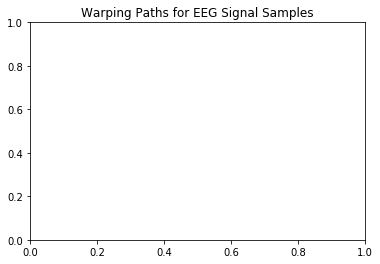

In [38]:
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")

In [42]:
d, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path, filename='bestpath.png')

(None, None)

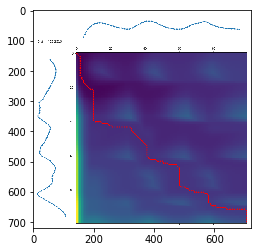

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('bestpath.png')
plt.imshow(img)

In [19]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 66),
 (67, 67),
 (68, 68),
 (69, 69),
 (70, 70),
 (71, 71),
 (72, 72),
 (73, 73),
 (74, 74),
 (75, 75),
 (76, 76),
 (77, 77),
 (78, 78),
 (79, 79),
 (80, 80),
 (81, 81),
 (82, 82),
 (83, 83),
 (84, 84),
 (85, 85),
 (86, 86),
 (87, 87),
 (88, 88),
 (89, 89),
 (90, 90),
 (91, 91),
 (92, 92

PLOT_0


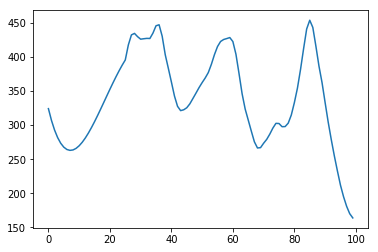

PLOT_1


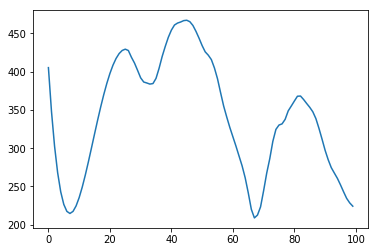

PLOT_2


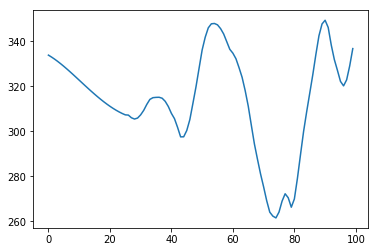

PLOT_3


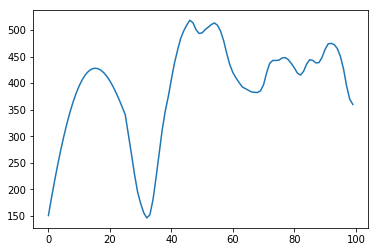

PLOT_4


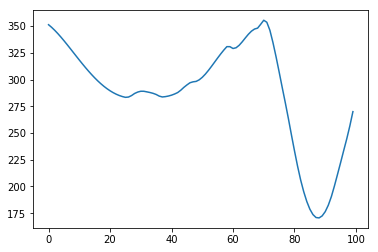

PLOT_5


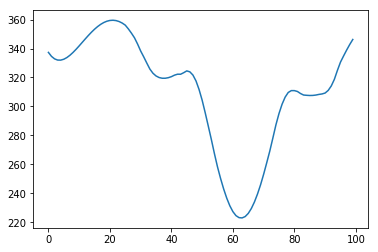

PLOT_6


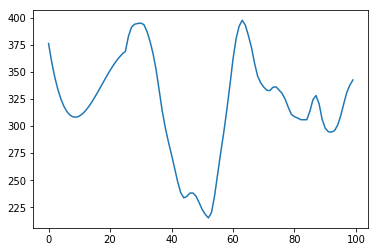

PLOT_7


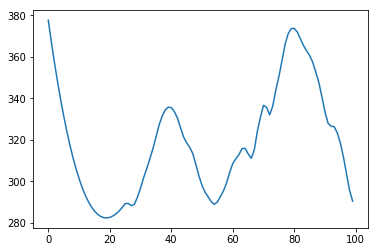

PLOT_8


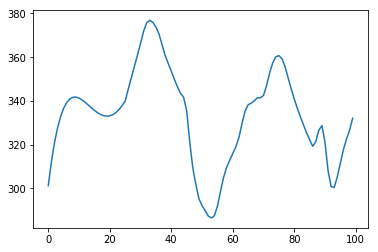

PLOT_9


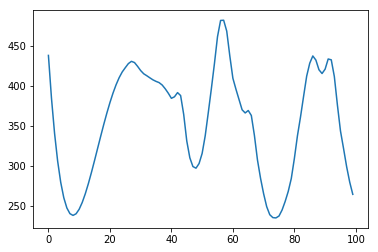

PLOT_10


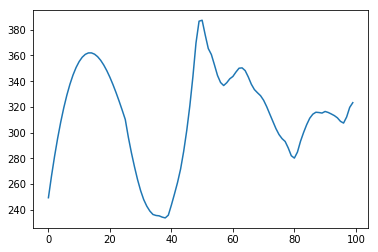

PLOT_11


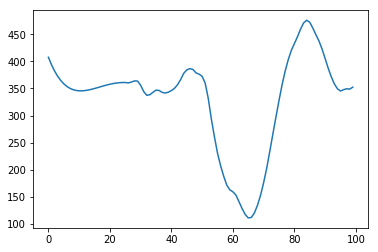

PLOT_12


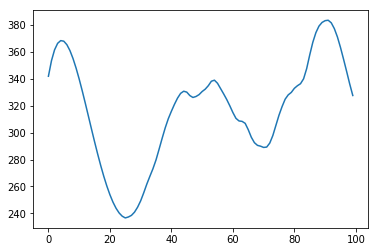

PLOT_13


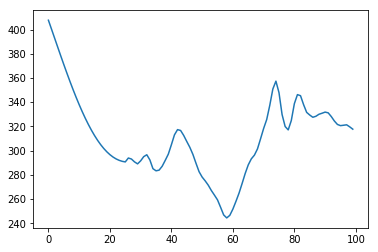

PLOT_14


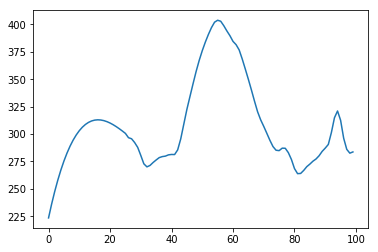

PLOT_15


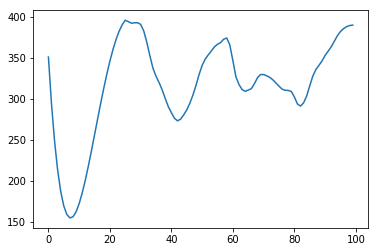

PLOT_16


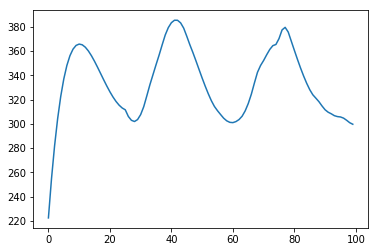

PLOT_17


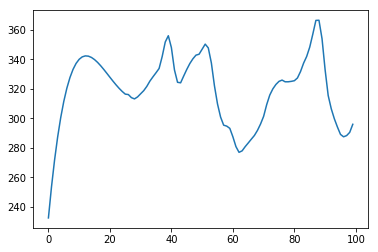

PLOT_18


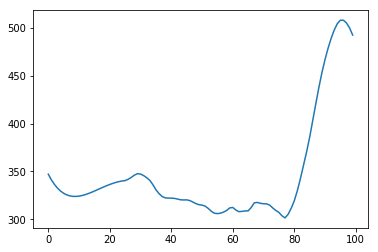

PLOT_19


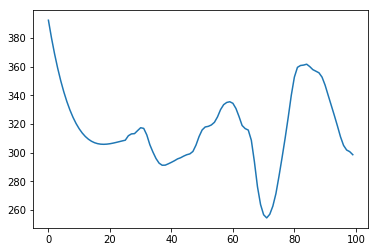

In [33]:
for i in range(20):
    print('PLOT_' + str(i))
    plt.plot(series_neuro_sky[i][:100])
    plt.show()

In [29]:
indices_dict = []
series_ecg_1 = []
series_ecg_2 = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    data_path = './../../ASCERTAIN_Raw/ECGData/Movie_P' + str(user_id).zfill(2) + '/ECG_Clip' + str(clip_id) + '.mat'
    #data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        ecg1 = signal['Data_ECG'][:,4]
        ecg2 = signal['Data_ECG'][:,4] 
        ecg1 = savgol_filter(ecg1, 501, 3)
        ecg2 = savgol_filter(ecg2, 501, 3)
        
        series_ecg_1.append(ecg1)
        series_ecg_2.append(ecg2)

In [ ]:
import numpy as np
import pandas as pd
import scipy.io
import os
from scipy.signal import savgol_filter
from dtaidistance import dtw
import seaborn as sns
from sklearn import preprocessing
from numpy import inf
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
import scipy.spatial.distance as ssd
from tqdm import tqdm

#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\\'

Features = pd.read_excel(load_path + 'Features.xlsx')

Ratings = pd.read_excel(load_path + 'Ratings.xlsx')

presentations_ids = Features['presentation_id'].values
presentations_ids.shape

indices_dict = []
series_ecg_1 = []
series_ecg_2 = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    data_path = './../../ASCERTAIN_Raw/ECGData/Movie_P' + str(user_id).zfill(2) + '/ECG_Clip' + str(clip_id) + '.mat'
    #data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        ecg1 = signal['Data_ECG'][:,4]
        ecg2 = signal['Data_ECG'][:,4] 
        ecg1 = savgol_filter(ecg1, 501, 3)
        ecg2 = savgol_filter(ecg2, 501, 3)
        
        series_ecg_1.append(ecg1)
        series_ecg_2.append(ecg2)
        
dm_ecg_1 = dtw.distance_matrix_fast(series_ecg_1, show_progress=True)
np.save('dm_ecg_1', dm_ecg_1)

dm_ecg_2 = dtw.distance_matrix_fast(series_ecg_2, show_progress=True)
np.save('dm_ecg_1', dm_ecg_2)